In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_csv("diyabet.csv")
print(df.info())
print(df.head())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8     

In [2]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Numerik Değişkenler:")
print(numeric_columns)

print("Kategorik Değişkenler:")
print(categorical_columns)

Numerik Değişkenler:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Kategorik Değişkenler:
Index([], dtype='object')


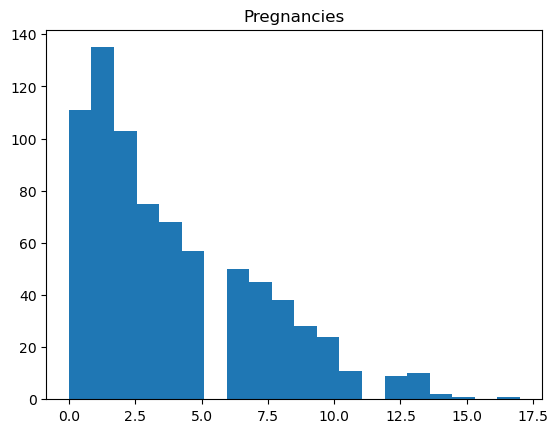

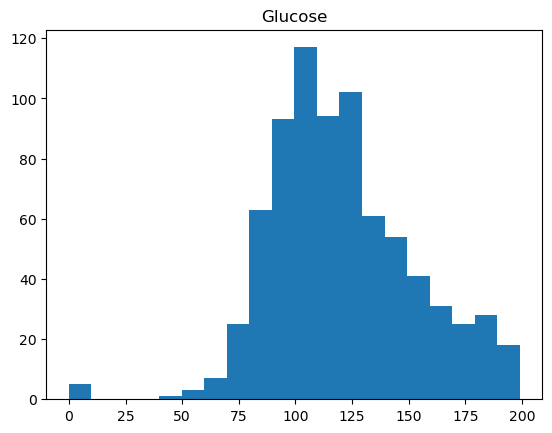

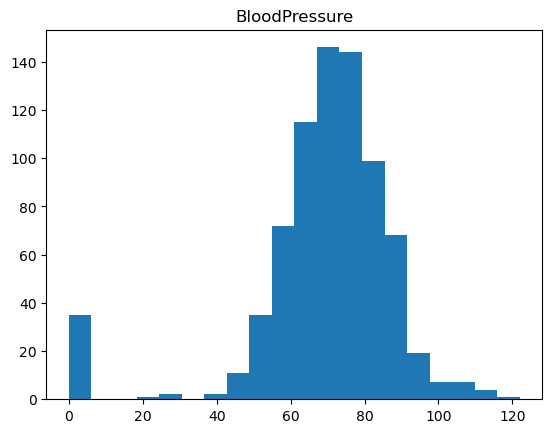

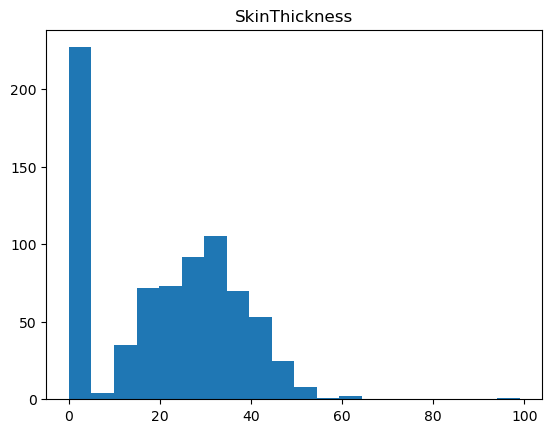

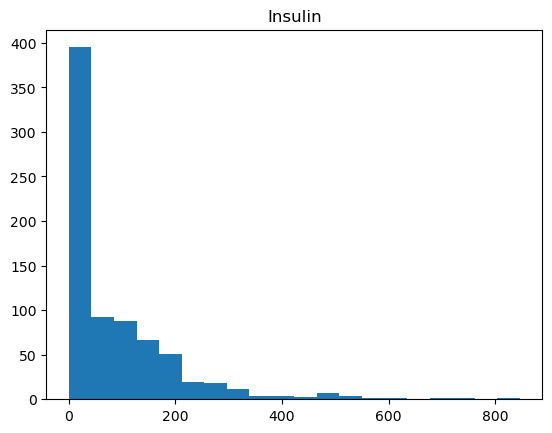

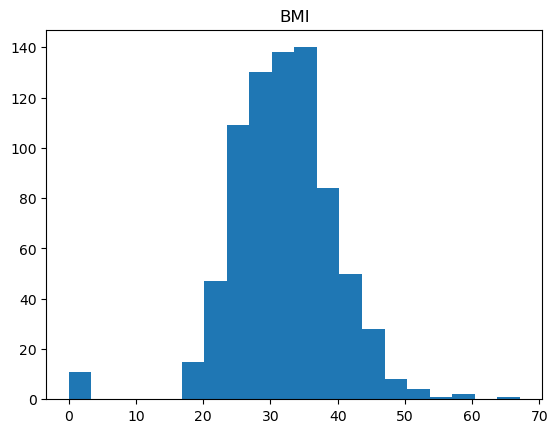

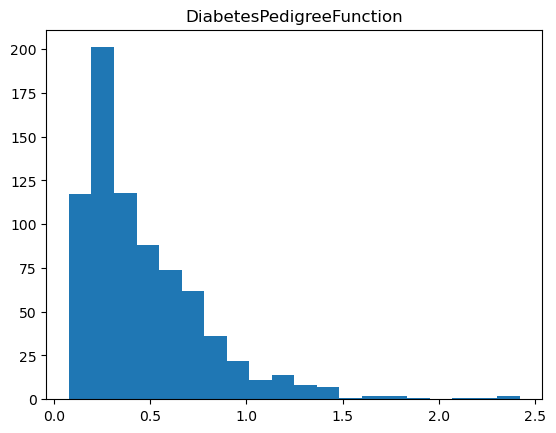

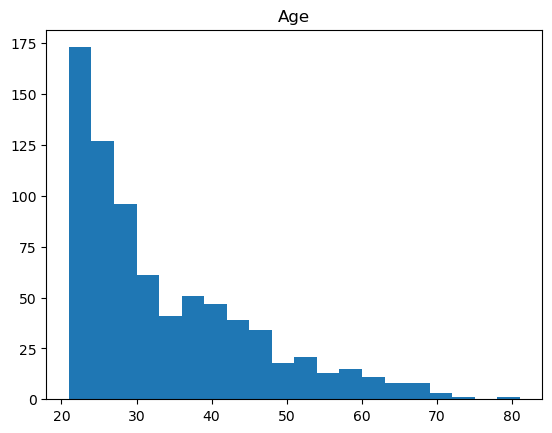

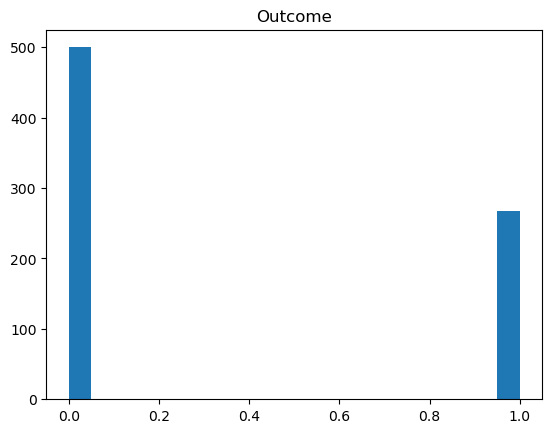

In [38]:
for col in numeric_columns:
    plt.hist(df[col], bins=20)
    plt.title(col)
    plt.show()

for col in categorical_columns:
    print(df[col].value_counts())

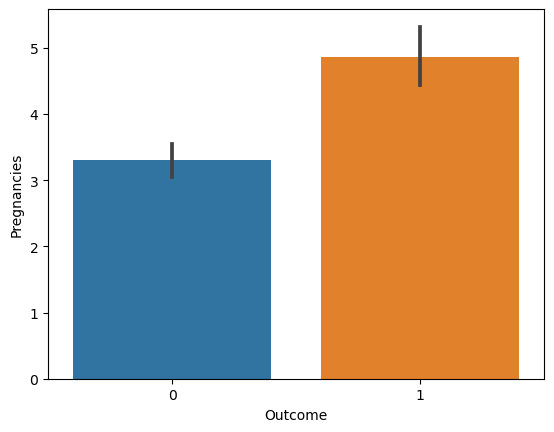

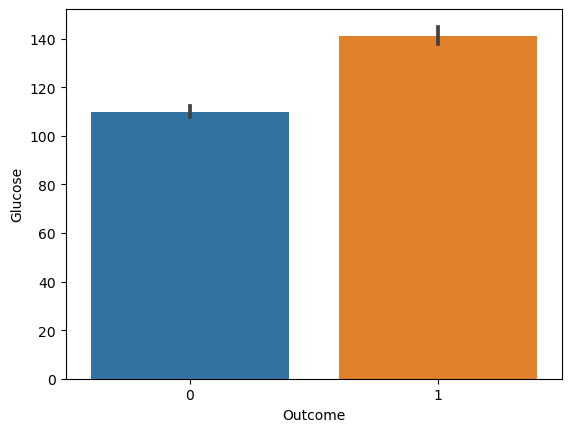

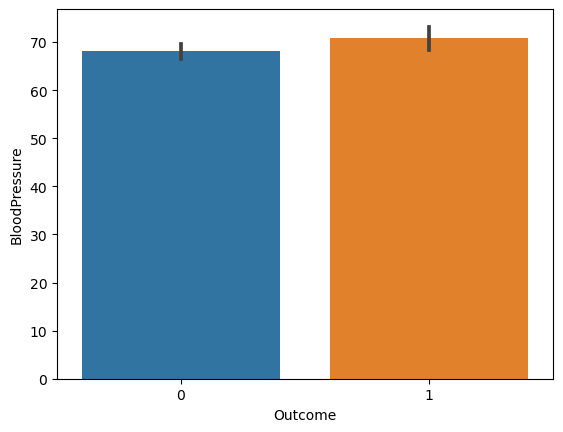

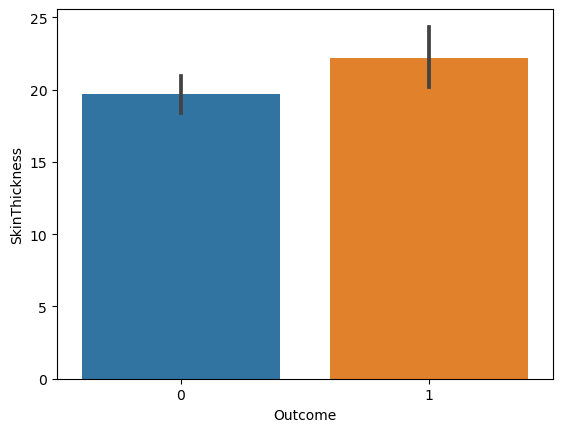

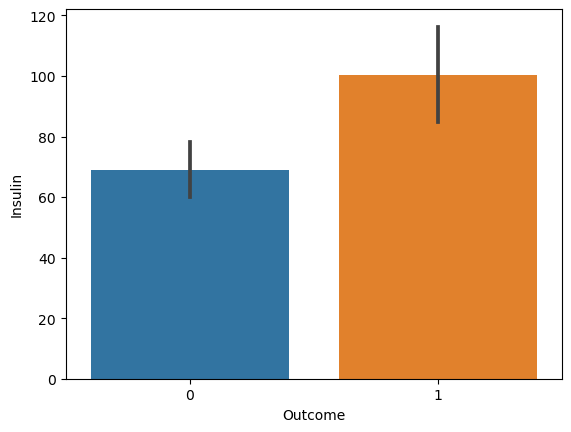

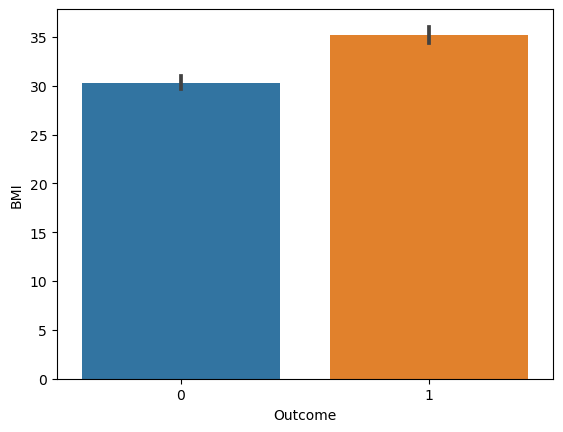

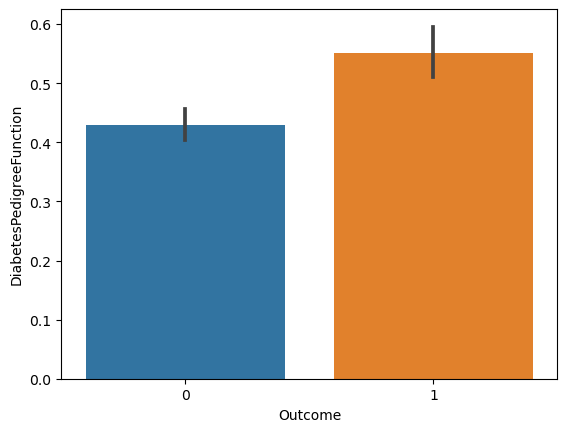

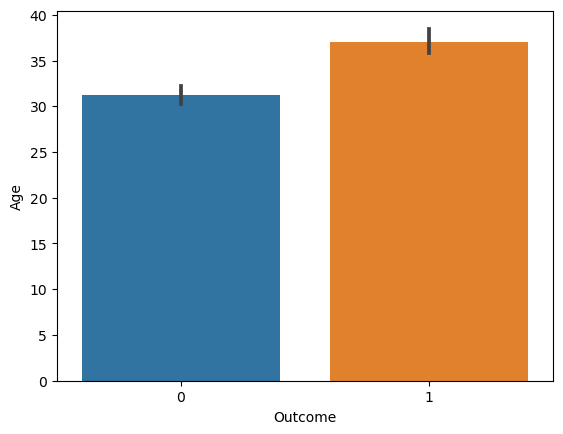

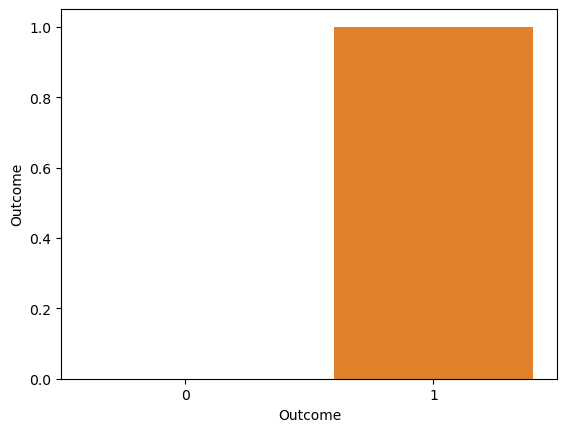

In [39]:
for col in categorical_columns:
    if col != "Outcome":
        print(df.groupby(col)["Outcome"].mean())

for col in numeric_columns:
    sns.barplot(x="Outcome", y=col, data=df)
    plt.show()

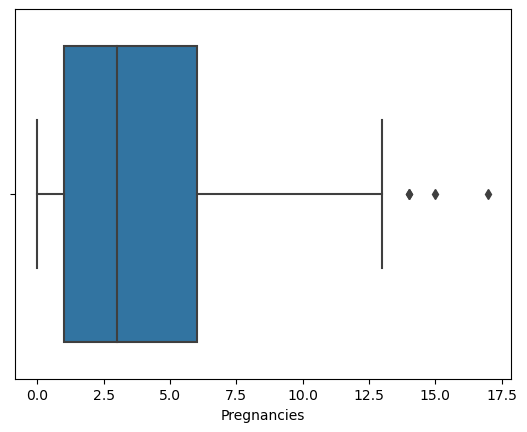

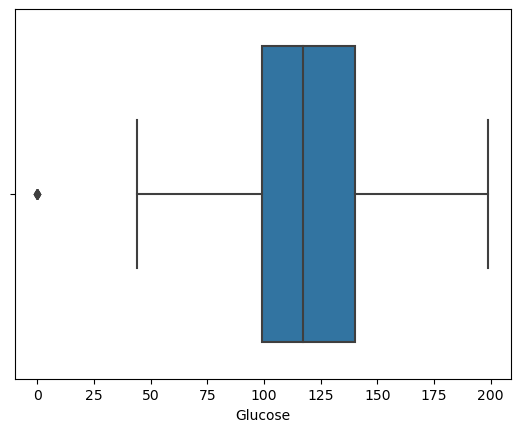

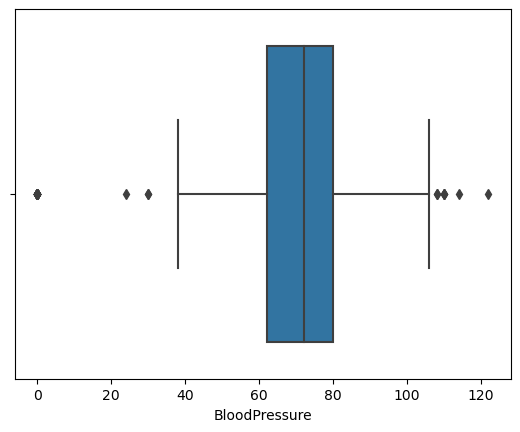

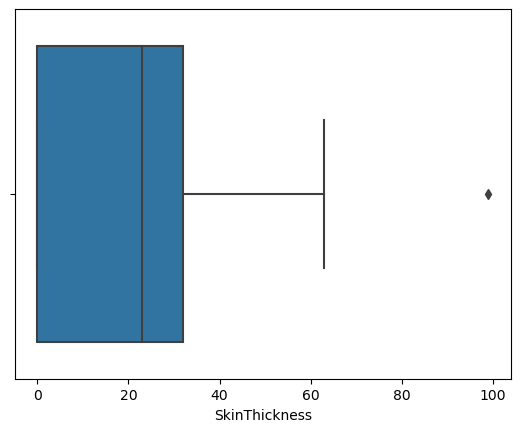

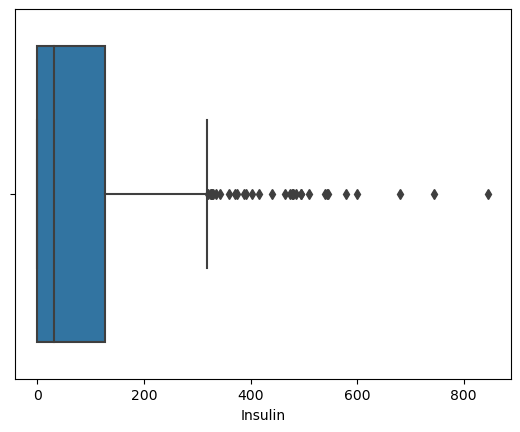

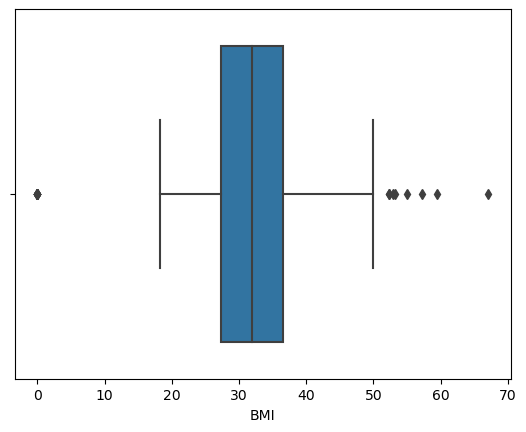

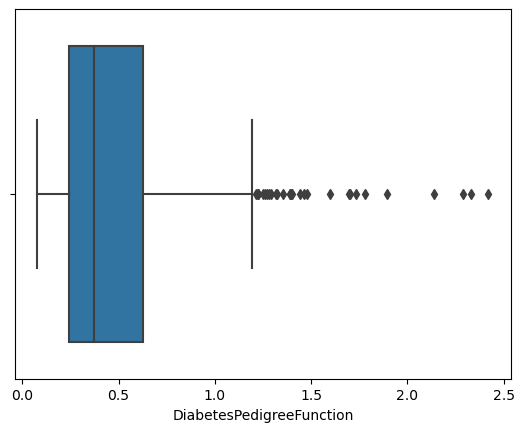

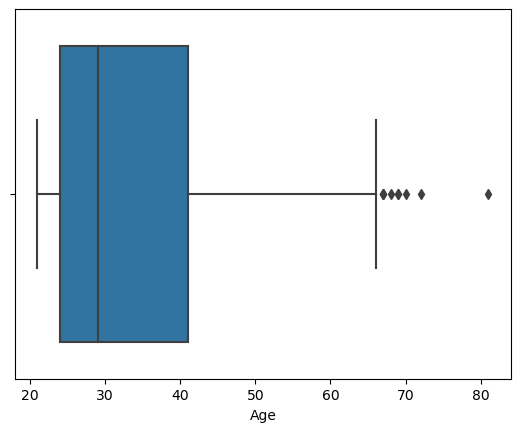

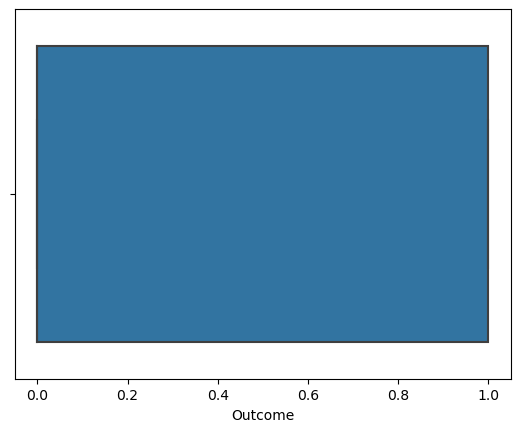

In [5]:
for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.show()

In [6]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


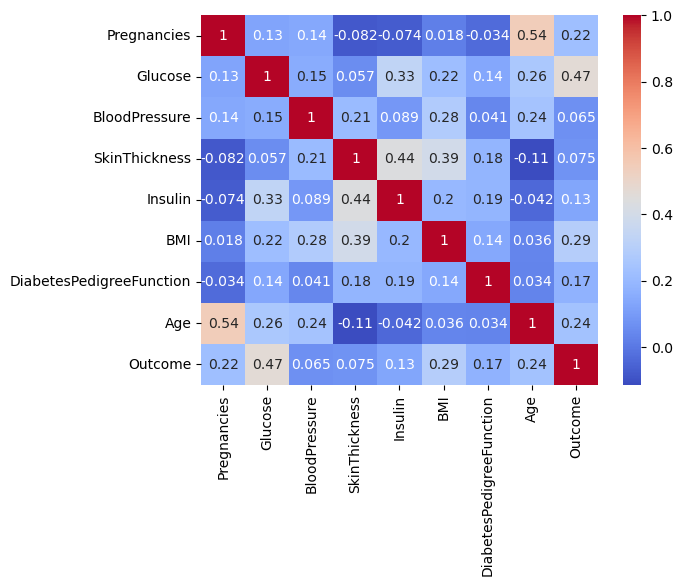

In [7]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [8]:
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [23]:
cols_with_zero_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero_values] = df[cols_with_zero_values].replace(0, np.nan)

In [25]:
df.dropna(inplace=True)

In [26]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [27]:
X = pd.get_dummies(X, drop_first=True)

In [28]:
scaler = StandardScaler()
X[cols_with_zero_values] = scaler.fit_transform(X[cols_with_zero_values])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [32]:
y_pred = model.predict(X_test)

In [34]:
print("Doğruluk Oranı:", accuracy_score(y_test, y_pred))
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))
print("Karışıklık Matrisi:")
print(confusion_matrix(y_test, y_pred))

Doğruluk Oranı: 0.759493670886076
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        52
           1       0.67      0.59      0.63        27

    accuracy                           0.76        79
   macro avg       0.73      0.72      0.72        79
weighted avg       0.75      0.76      0.76        79

Karışıklık Matrisi:
[[44  8]
 [11 16]]
